## Data Analysis/Data Visualization Report: Bike Ride Trends and Biker Types of Ford GoBike System for 2019 (february)
    
#### by Manpreet Kaur

## Investigation Overview

In this investigation of the Ford GoBike System, I wanted to know about how the bike usage was affected with respect to user type, age, time, and gender.

## Dataset Overview

The dataset used for this project consist of only one month data i.e. february 2019 in CSV format.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
no_color = sb.color_palette()[0]
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and convet columns into correct dtypes
df_clean = pd.read_csv('fordgobike_trips_2019_clean.csv')
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,member_age
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,February,45
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,29.883333,2019-02-28,23,Thursday,February,60
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,19.116667,2019-02-28,23,Thursday,February,36
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989,Male,No,26.916667,2019-02-28,23,Thursday,February,30
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988,Other,No,26.166667,2019-02-28,23,Thursday,February,31


In [3]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170228 entries, 0 to 170227
Data columns (total 22 columns):
duration_sec               170228 non-null int64
start_time                 170228 non-null object
end_time                   170228 non-null object
start_station_id           170228 non-null float64
start_station_name         170228 non-null object
start_station_latitude     170228 non-null float64
start_station_longitude    170228 non-null float64
end_station_id             170228 non-null float64
end_station_name           170228 non-null object
end_station_latitude       170228 non-null float64
end_station_longitude      170228 non-null float64
bike_id                    170228 non-null int64
user_type                  170228 non-null object
member_birth_year          170228 non-null int64
member_gender              170228 non-null object
bike_share_for_all_trip    170228 non-null object
duration_minute            170228 non-null float64
start_date                 170228 n

In [4]:
# Change start_time and end_time to datetime format
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

# Changing the user_type, member_gender, and bike_share_for_all_trip to category format

df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

# Changing the bike_id, start_station_id, and end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

#changing birth year to int
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)
#add a new column calculating riders' age from 'member_birth_year'
df_clean['member_age'] = 2019 - df_clean['member_birth_year']


df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170228 entries, 0 to 170227
Data columns (total 22 columns):
duration_sec               170228 non-null int64
start_time                 170228 non-null datetime64[ns]
end_time                   170228 non-null datetime64[ns]
start_station_id           170228 non-null object
start_station_name         170228 non-null object
start_station_latitude     170228 non-null float64
start_station_longitude    170228 non-null float64
end_station_id             170228 non-null object
end_station_name           170228 non-null object
end_station_latitude       170228 non-null float64
end_station_longitude      170228 non-null float64
bike_id                    170228 non-null object
user_type                  170228 non-null category
member_birth_year          170228 non-null int32
member_gender              170228 non-null category
bike_share_for_all_trip    170228 non-null category
duration_minute            170228 non-null float64
start_date    

In [5]:
#add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

df_clean['duration_minute'] = df_clean['duration_sec']/60

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hourofday'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_dayofweek'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')
df_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,member_age
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,February,45
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,29.883333,2019-02-28,23,Thursday,February,60
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,19.116667,2019-02-28,23,Thursday,February,36
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989,Male,No,26.916667,2019-02-28,23,Thursday,February,30
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988,Other,No,26.166667,2019-02-28,23,Thursday,February,31
5,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Subscriber,1992,Male,No,17.483333,2019-02-28,23,Thursday,February,27
6,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Subscriber,1996,Female,Yes,7.633333,2019-02-28,23,Thursday,February,23
7,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,...,Subscriber,1993,Male,No,8.433333,2019-02-28,23,Thursday,February,26
8,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,...,Customer,1990,Male,No,19.600000,2019-02-28,23,Thursday,February,29
9,395,2019-02-28 23:56:26.848,2019-03-01 00:03:01.947,243.0,Bancroft Way at College Ave,37.869360,-122.254337,252.0,Channing Way at Shattuck Ave,37.865847,...,Subscriber,1988,Male,No,6.583333,2019-02-28,23,Thursday,February,31


### Ride Duration before transformation

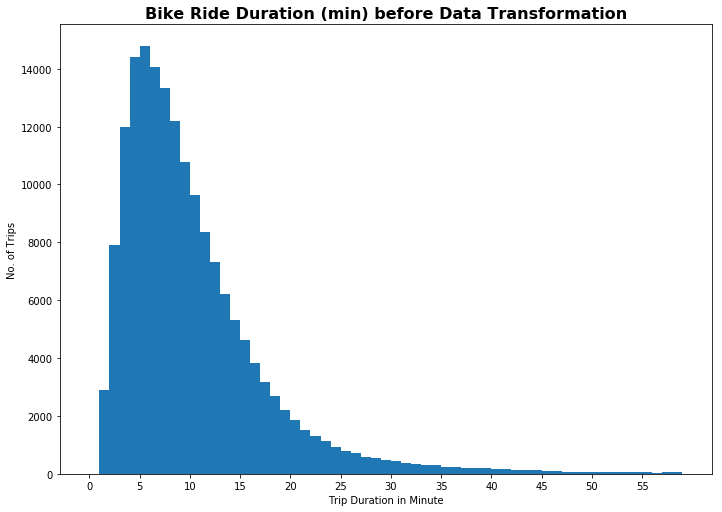

In [6]:
plt.figure(figsize=[ 11.69, 8.27]);
bins = np.arange(0, 60, 1)
ticks = np.arange(0, 60, 5)
plt.hist(data=df_clean, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('No. of Trips')
plt.title("Bike Ride Duration (min) before Data Transformation",fontsize=16, fontweight='bold', color = 'black');
plt.show()

### Ride Duration after transformation

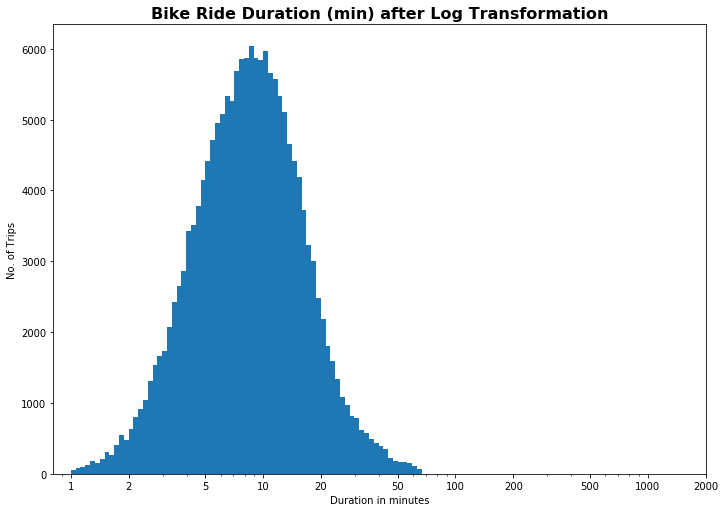

In [7]:
# there's a long tail in the distribution, so let's put it on a log scale instead
# Log scale transformation to meet the noramlity assumption

binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minute'].max())+binsize, binsize)

plt.figure(figsize=[ 11.69, 8.27]);
plt.hist(data = df_clean, x = 'duration_minute', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration in minutes');
plt.ylabel('No. of Trips')
plt.title("Bike Ride Duration (min) after Log Transformation",fontsize=16, fontweight='bold', color = 'black');

### Ford GoBike System User by Gender

In [8]:
member_count=df_clean.member_gender.value_counts()
member_count

Male      126724
Female     39971
Other       3533
Name: member_gender, dtype: int64

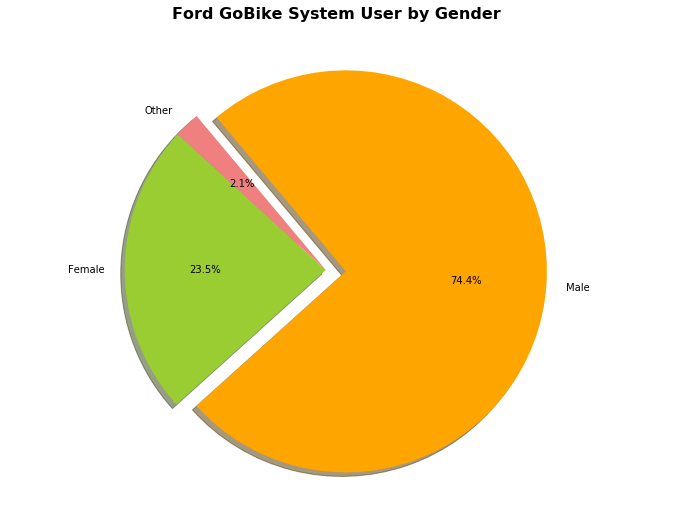

In [9]:
plt.figure(figsize=[ 11.69, 8.27]);
explode = (0.1, 0, 0)  # explode 1st slice
colors = ['orange', 'yellowgreen', 'lightcoral']
plt.pie(member_count, labels = member_count.index, explode=explode,startangle = 130, autopct= '%1.1f%%', counterclock = False, colors=colors,shadow=True);
plt.axis('equal');
plt.title('Ford GoBike System User by Gender', y=1.05, fontsize=16, fontweight='bold', color = 'black');

The above visualization demostrates the majority of the bike sharing system are male bikers and are about 3 times of female bikers.

### Customer vs. Subscriber Usage by Age

Below plot conveys the following things,

the first thing is y-axis is not same for the both customers and sbscribers.

Highest no. of Subscribers are of 31 years old and Most of customers are of 30 years old.

Subscribers has wider range of ages (40-55)as compared to customers (most commonly under 30).

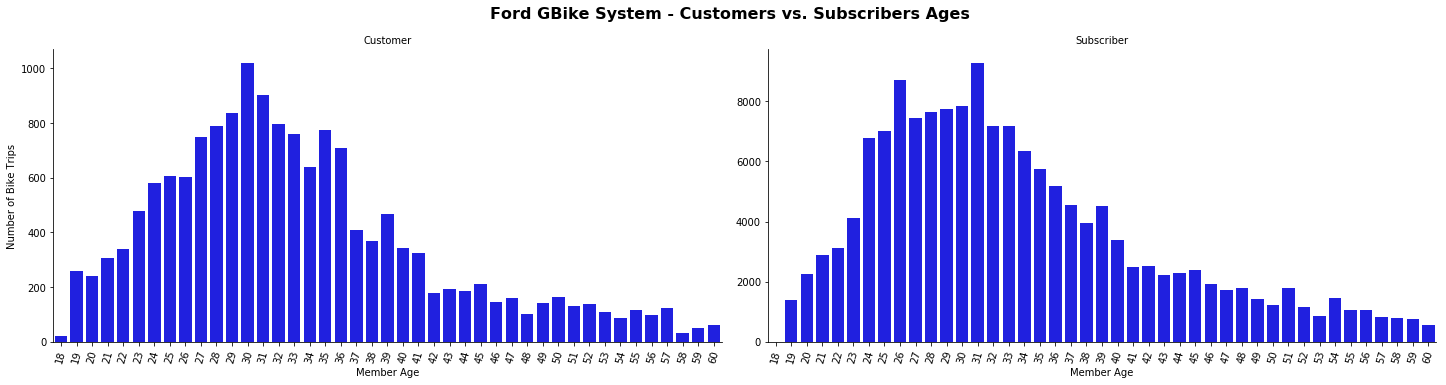

In [10]:
# # Customer vs. Subscriber Usage by Age
graph = sb.catplot(data = df_clean, x = 'member_age', col='user_type', kind='count', sharey = False, color = 'blue', height=5, aspect=2)

graph.set_axis_labels('Member Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GBike System - Customers vs. Subscribers Ages', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

### 'Ford GoBike System - Trip Duration (Minute) per User Type and Gender

Below plot demostrates follwing;

Both female subscribers and customers take longer trips than male subscriber amnd customers.This differnce is more visible for the all three type of (female,male and others)customers as compared to subscribers.Female customers take 14 minutes of trip duration.

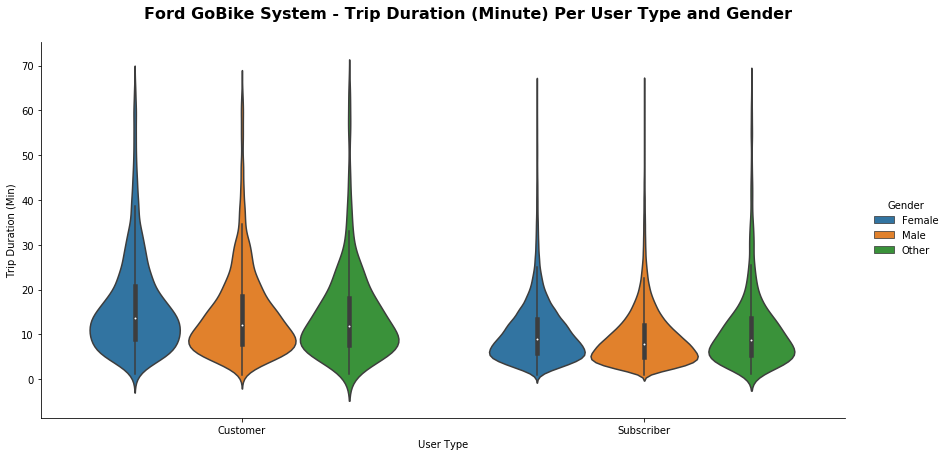

In [11]:
# Violinplot - duration (minute) per user type and gender

graph = sb.catplot(data=df_clean, x='user_type', y="duration_minute", hue="member_gender", kind="violin", height=6, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Minute) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

### How does the average trip duration vary in weekdays between customers and subscribers?

Below plot presents following:

Subscribers ride much shorter/quicker trips as compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays , especially for customer riders. Subscribers usage seems to be more stable and has very consistent average duration Monday through Friday than customers overall.

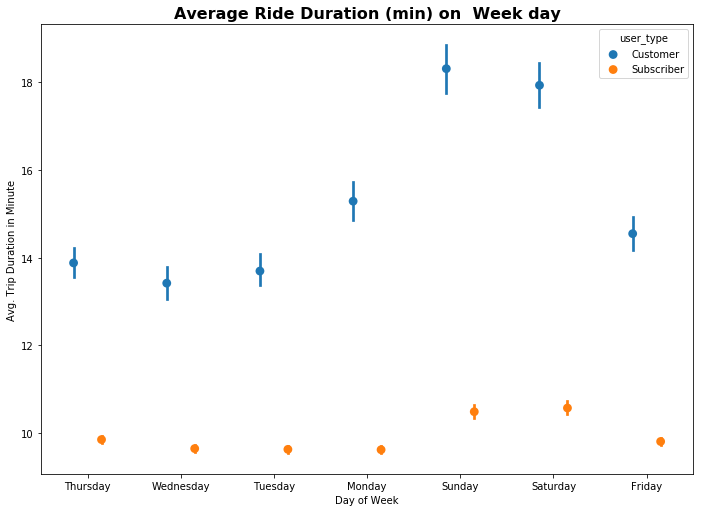

In [12]:
plt.figure(figsize=[ 11.69, 8.27]);
sb.pointplot(data=df_clean, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title("Average Ride Duration (min) on  Week day",fontsize=16, fontweight='bold', color = 'black');

### Ford GoBike System - Summary

This project is a win - win situation and large number of prople can benefit from this bike sharing system.It has following benefits.

1.The System is eco-friendly, budget friendly, and lifetsyle friendly for both user type.

2.Affordable and convenient transportation for the people.

5.Renting a bike from theFord GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work.

There are two types of users i.e Subscribers are primary users or daily commuters, having short trips to and from work, who rent a bike on weekdays.Customers are usually tourists or occassional riders who use the system mainly on weekends.
Most of the bikers (subscribers) are male.Female users rented bikes for longer duration on average 14 minutes as comapered to male bikers.Subscribers has consistent average duartion from monday to friday as compared to customer users. Duration of trip increase on weekends for both type of users.

In [13]:
!jupyter nbconvert Slide-deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Slide-deck.ipynb to slides
[NbConvertApp] Writing 483988 bytes to Slide-deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\manpr\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\manpr\Anaconda3\lib\site-packages\jupyter_core\application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\manpr\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\manpr\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "C:\Users\manpr\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\manpr\A